<a href="https://colab.research.google.com/github/Lakxz/PRODIGY_DS_01/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("twitter_training.csv", header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.columns = ['id', 'brand', 'sentiment', 'text']
df.head()

,id,brand,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   brand      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [6]:
df = df.dropna()
df = df[df['sentiment'] != 'Irrelevant']

In [7]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

In [9]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [10]:
df['sentiment'] = df['sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
})

In [11]:
X = df['clean_text']
y = df['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7577096114519427


In [16]:
confusion_matrix(y_test, y_pred)

array([[3594,  433,  400],
       [ 560, 2507,  611],
       [ 460,  498, 3162]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      4427
           1       0.73      0.68      0.70      3678
           2       0.76      0.77      0.76      4120

    accuracy                           0.76     12225
   macro avg       0.76      0.75      0.75     12225
weighted avg       0.76      0.76      0.76     12225



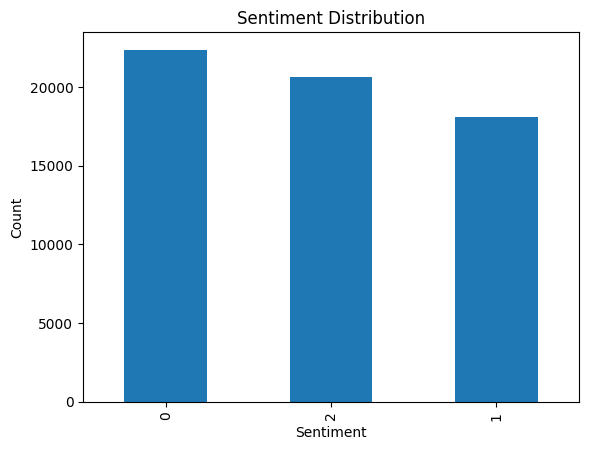

In [18]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [19]:
brand_sentiment = df.groupby(['brand', 'sentiment']).size().unstack().fillna(0)
brand_sentiment.head()

sentiment,0,1,2
brand,,,
Amazon,575,1207,308
ApexLegends,591,936,634
AssassinsCreed,375,156,1439
Battlefield,464,351,586
Borderlands,426,597,1017
